In [3]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Gaussian Mixture

Os Modelos de Mistura Gaussiana (Gaussian Mixture Models, GMMs) são uma poderosa técnica de aprendizado de máquina usada principalmente para modelagem de densidade de probabilidade e tarefas de clusterização. Eles são particularmente eficazes quando os dados subjacentes têm uma estrutura complexa e não podem ser adequadamente modelados por um único modelo de distribuição.

A ideia fundamental por trás dos GMMs é que um conjunto de dados pode ser representado como uma combinação ponderada de várias distribuições gaussianas (também conhecidas como normais). Cada uma dessas distribuições gaussianas representa um cluster ou componente latente dos dados. Portanto, em vez de assumir que os dados pertencem a um único cluster, os GMMs permitem que os dados sejam uma mistura de várias distribuições gaussianas.

Descrição passo a passo de como o algoritmo de clusterização OPTICS funciona:

**1. Inicialização:** Primeiro, você precisa iniciar os parâmetros do modelo. Isso inclui o número de componentes gaussianos (clusters) a serem usados e as estimativas iniciais dos parâmetros para cada componente, como médias, covariâncias e pesos.

**2. Expectation-Maximization (EM):** A etapa mais crucial na modelagem de GMMs é a aplicação do algoritmo Expectation-Maximization. Este é um algoritmo iterativo que é usado para ajustar os parâmetros do modelo com base nos dados de treinamento.

**<ul>Expectation (E-step):** Nesta etapa, você calcula as probabilidades de pertencimento de cada ponto de dados a cada componente gaussiano. Isso é feito usando a função de densidade de probabilidade gaussiana e os parâmetros atuais do modelo.</ul>
**<ul>Maximization (M-step):** Na etapa de maximização, você atualiza os parâmetros do modelo, ou seja, as médias, covariâncias e pesos, com base nas probabilidades calculadas no passo anterior.</ul>

**3. Convergência:** O processo de E-M é repetido iterativamente até que o modelo alcance a convergência, ou seja, até que os parâmetros não mudem significativamente entre iterações subsequentes.

**4. Atribuição de Cluster:** Depois de treinar o modelo GMM, você pode usá-lo para atribuir pontos de dados a clusters. Isso é feito calculando a probabilidade de pertencimento de cada ponto a cada componente gaussiano e atribuindo o ponto ao cluster com a probabilidade mais alta.

Os GMMs têm várias vantagens, incluindo a capacidade de modelar distribuições de dados complexas e sobrepostas. No entanto, eles também têm algumas limitações, como a sensibilidade à inicialização e a necessidade de especificar o número de componentes gaussianos. Portanto, a seleção adequada do número de clusters é uma etapa crítica no uso de GMMs para clusterização.



# DATA

In [4]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

# Normalizando os dados
from scipy.stats import zscore
X_syn_ctrl = zscore(X_syn_ctrl)
X_iris = zscore(X_iris)
X_wine = zscore(X_wine)

<h1>Redução de dimensionalidade</h1>

In [5]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [6]:
from sklearn.mixture import GaussianMixture

gm_labels_syn_ctrl = GaussianMixture(n_components=6).fit_predict(X_syn_ctrl)
gm_labels_iris = GaussianMixture(n_components=3).fit_predict(X_iris)
gm_labels_wine = GaussianMixture(n_components=3).fit_predict(X_wine)

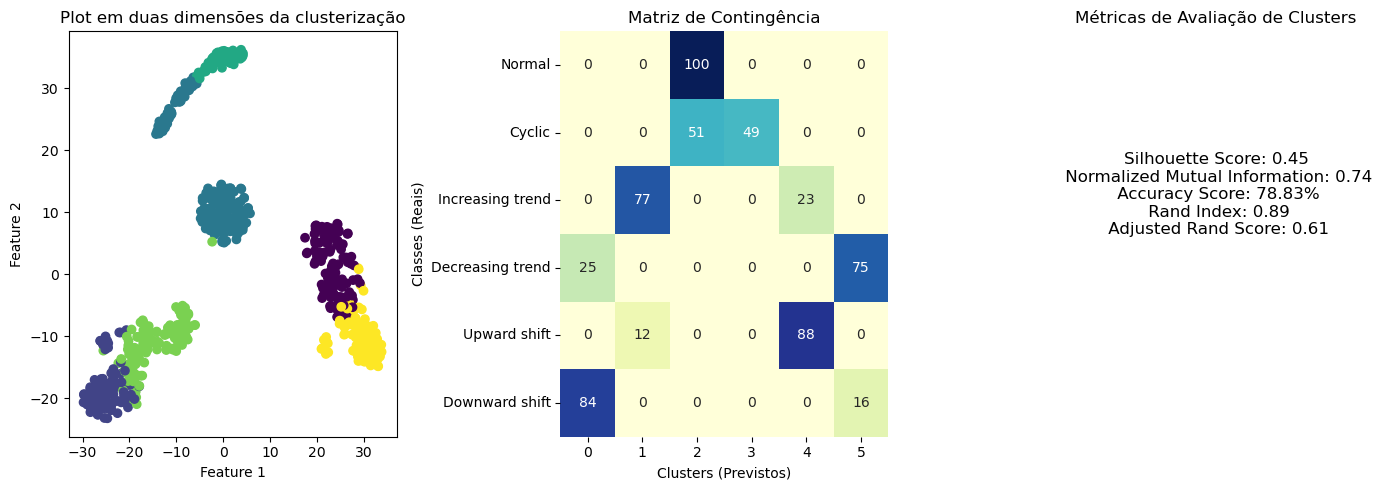

In [7]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, gm_labels_syn_ctrl, syn_ctrl_target_names)

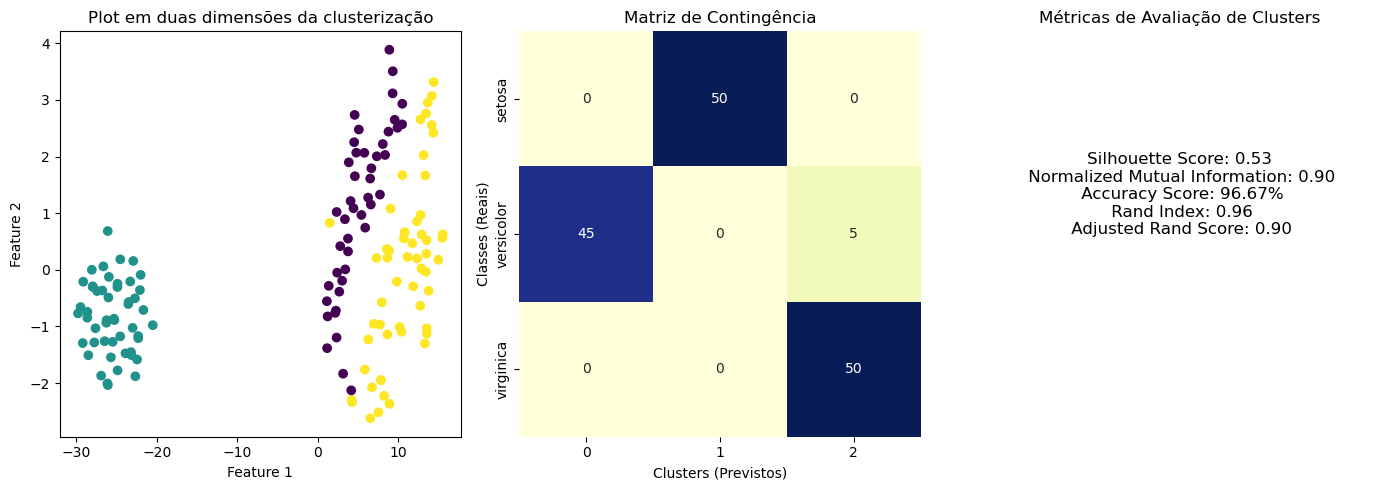

In [8]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, gm_labels_iris, iris_target_names)

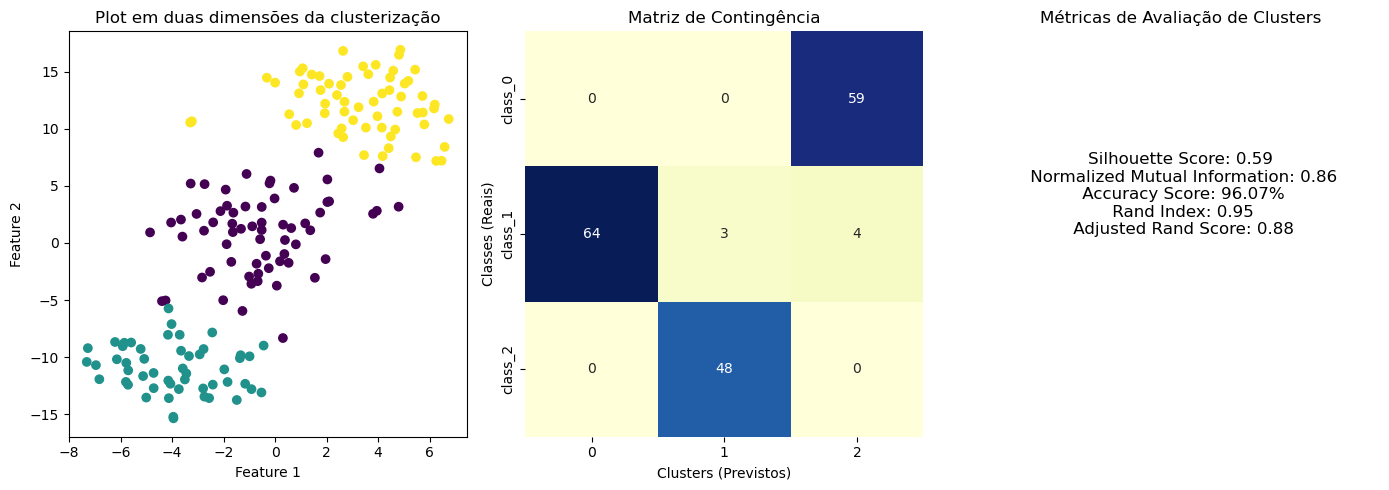

In [9]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, gm_labels_wine, wine_target_names)